[The Human Mortality Database](https://www.mortality.org/hmd/RUS/STATS/E0per.txt) *(mortality.org)*<br />
[ЕМИСС](https://www.fedstat.ru/indicator/31293) - Единая межведомственная информационно-статистическая система) *(fedstat.ru)*<br />
"[Продолжительность жизни в субъектах Российской Федерации](https://ru.wikipedia.org/wiki/Продолжительность_жизни_в_субъектах_Российской_Федерации)" *(wiki)*<br />
[Файл:Ожидаемая продолжительность жизни, Россия, 1990-2009.png](https://ru.wikipedia.org/wiki/Файл:Ожидаемая_продолжительность_жизни,_Россия,_1990-2009.png) *в русскоязычной Википедии*<br />
[Category:Life expectancy charts for Russia](https://commons.wikimedia.org/wiki/Category:Life_expectancy_charts_for_Russia) *на Викискладе*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = 50
pd.options.display.max_rows = 100

In [3]:
# load info from Rosstat
df_rosstat = pd.read_excel('data/Rosstat_by_year_and_gender.xls', skiprows=2)

print(df_rosstat.shape)
df_rosstat

(3, 34)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Российская Федерация,Женщины,все население,74.3,74.2,73.7,71.8,71.1,71.6,72.4,72.8,73.1,72.4,72.3,72.2,71.9,71.9,72.4,72.5,73.3,74.0,74.3,74.8,74.9,75.61,75.86,76.30,76.47,76.71,77.06,77.64,77.82,78.17,76.43
1,Российская Федерация,Мужчины,все население,63.7,63.4,61.9,58.8,57.4,58.1,59.6,60.9,61.2,59.9,59.0,58.9,58.7,58.6,58.9,58.9,60.4,61.5,61.9,62.9,63.1,64.04,64.56,65.13,65.29,65.92,66.50,67.51,67.75,68.24,66.49
2,Российская Федерация,Оба пола,все население,69.2,68.9,67.8,65.0,63.9,64.5,65.8,66.7,67.1,65.9,65.3,65.2,65.0,64.9,65.3,65.4,66.7,67.6,68.0,68.8,68.9,69.83,70.24,70.76,70.93,71.39,71.87,72.70,72.91,73.34,71.54


In [4]:
# drop redundant columns
df_rosstat.drop(['Unnamed: 0', 'Unnamed: 2'], axis='columns', inplace=True)

# convert gender column to index
df_rosstat.set_index('Unnamed: 1', inplace=True)

# for brevityh of display remove name of index column.
df_rosstat.index.name = ''

print(df_rosstat.shape)
df_rosstat

(3, 31)


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Женщины,74.3,74.2,73.7,71.8,71.1,71.6,72.4,72.8,73.1,72.4,72.3,72.2,71.9,71.9,72.4,72.5,73.3,74.0,74.3,74.8,74.9,75.61,75.86,76.30,76.47,76.71,77.06,77.64,77.82,78.17,76.43
Мужчины,63.7,63.4,61.9,58.8,57.4,58.1,59.6,60.9,61.2,59.9,59.0,58.9,58.7,58.6,58.9,58.9,60.4,61.5,61.9,62.9,63.1,64.04,64.56,65.13,65.29,65.92,66.50,67.51,67.75,68.24,66.49
Оба пола,69.2,68.9,67.8,65.0,63.9,64.5,65.8,66.7,67.1,65.9,65.3,65.2,65.0,64.9,65.3,65.4,66.7,67.6,68.0,68.8,68.9,69.83,70.24,70.76,70.93,71.39,71.87,72.70,72.91,73.34,71.54


In [5]:
# transform dataframe to more convenient form
df_rosstat = df_rosstat.rename(index={
    'Женщины': 'females',
    'Мужчины': 'males',
    'Оба пола': 'overall'
}).reindex(['females', 'overall', 'males', ])

df_rosstat = df_rosstat.transpose()
df_rosstat.index = df_rosstat.index.map(int)
df_rosstat

,females,overall,males
1990,74.30,69.20,63.70
1991,74.20,68.90,63.40
1992,73.70,67.80,61.90
1993,71.80,65.00,58.80
1994,71.10,63.90,57.40
1995,71.60,64.50,58.10
1996,72.40,65.80,59.60
1997,72.80,66.70,60.90
1998,73.10,67.10,61.20
1999,72.40,65.90,59.90


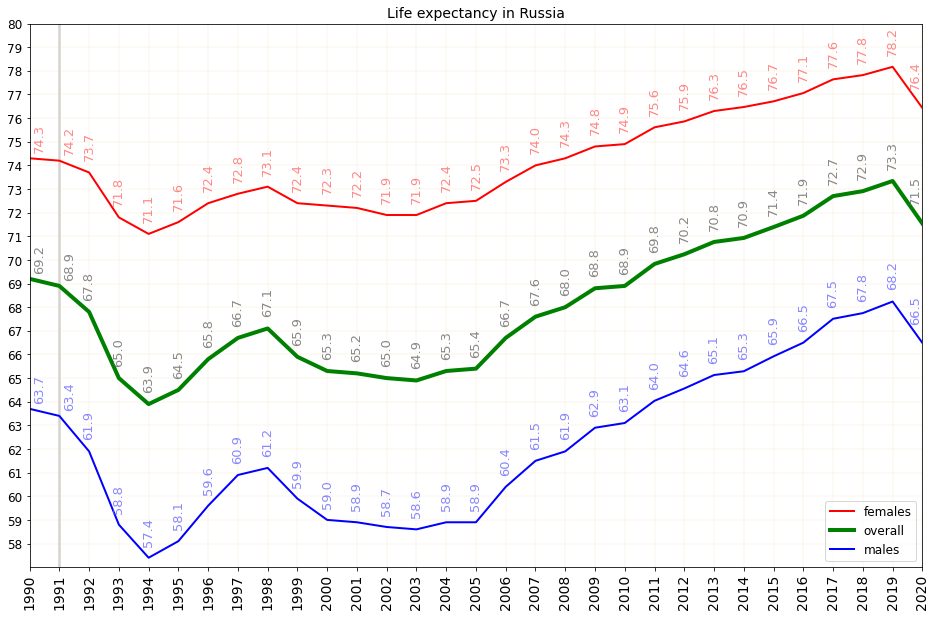

In [6]:
# create chart for life expectancy according to Rosstat
plt.rcParams['figure.figsize'] = (16, 10)

year_min = df_rosstat.index[0]
year_max = df_rosstat.index[-1]

plt.title('Life expectancy in Russia', fontsize=14)

for row_name, color_line, color_text, line_width in zip(['females', 'overall', 'males'],
                                                        ['red', 'green', 'blue'],
                                                        ['#FF6060', '#606060',  '#6060FF'],
                                                        [2, 4, 2]):
    plt.plot(df_rosstat.index, df_rosstat[row_name], linestyle='-', color=color_line, linewidth=line_width, label=row_name)
    for x,y in zip(df_rosstat.index, df_rosstat[row_name]):
        label = "{:.1f}".format(y)
        plt.annotate(label, # this is the text
                     (x+0.12,y-0.05) if (x in df_rosstat.index[0:2]) else (x,y+0.5) if x==year_max else (x,y+0.2), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='left' if (x in df_rosstat.index[0:2]) else 'right' if x==year_max else 'center', # horizontal alignment can be left, right or center
                     color=color_text,
                     alpha=0.75,
                     rotation=90,
                     fontsize=13)

plt.axvline(x=1991, color='lightgrey', linewidth=2.5, zorder=0)
# plt.axvline(x=2000, color='lightgrey', linewidth=1)

plt.xlim(year_min, year_max)
plt.grid(color='wheat', linewidth=0.25)

labels_x = range(year_min, year_max+1)
labels_y = range(58, 81)
plt.ylim(57, 80)
plt.xticks(labels_x, fontsize=14, rotation='vertical')
plt.yticks(labels_y, fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.show()

In [7]:
dd_to_rus = {'females': 'Женщины',
             'overall': 'Всё население',
             'males': 'Мужчины'}

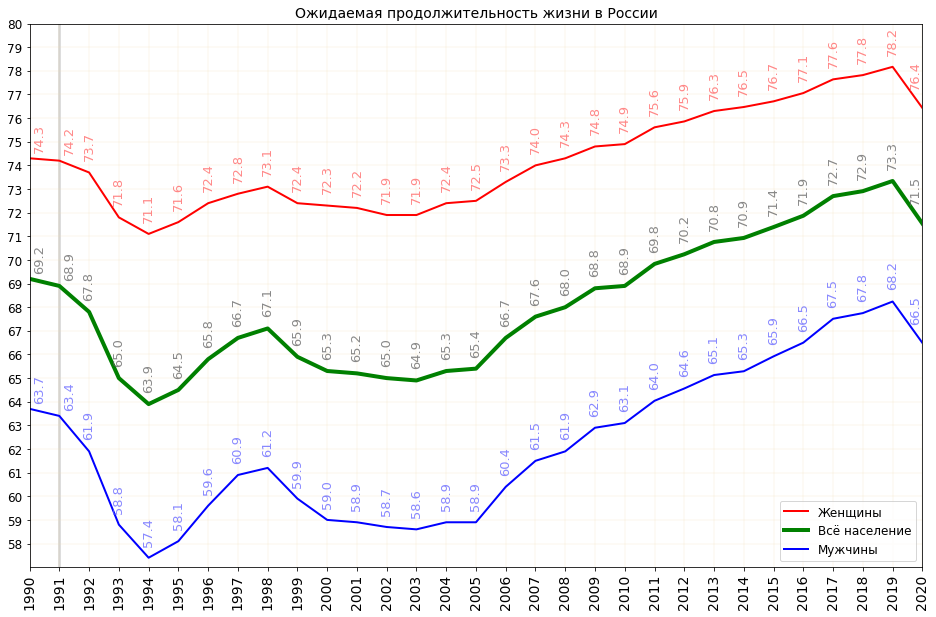

In [8]:
# Russian version of the chart
plt.title('Ожидаемая продолжительность жизни в России', fontsize=14)

for row_name, color_line, color_text, line_width in zip(['females', 'overall', 'males'],
                                                        ['red', 'green', 'blue'],
                                                        ['#FF6060', '#606060',  '#6060FF'],
                                                        [2, 4, 2]):
    plt.plot(df_rosstat.index, df_rosstat[row_name], linestyle='-', color=color_line, linewidth=line_width, label=dd_to_rus[row_name])
    for x,y in zip(df_rosstat.index, df_rosstat[row_name]):
        label = "{:.1f}".format(y)
        plt.annotate(label, # this is the text
                     (x+0.12,y-0.05) if (x in df_rosstat.index[0:2]) else (x,y+0.5) if x==year_max else (x,y+0.2), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='left' if (x in df_rosstat.index[0:2]) else 'right' if x==year_max else 'center', # horizontal alignment can be left, right or center
                     color=color_text,
                     alpha=0.75,
                     rotation=90,
                     fontsize=13)

plt.axvline(x=1991, color='lightgrey', linewidth=2.5, zorder=0)
# plt.axvline(x=2000, color='lightgrey', linewidth=1)

plt.xlim(year_min, year_max)
plt.grid(color='wheat', linewidth=0.25)

labels_x = range(year_min, year_max+1)
labels_y = range(58, 81)
plt.ylim(57, 80)
plt.xticks(labels_x, fontsize=14, rotation='vertical')
plt.yticks(labels_y, fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.show()

<br />
<br />
<br />

In [9]:
# load info from the Human Mortality Database
df_hmdb = pd.read_csv('data/HMD_Russia.csv', sep='\t', index_col='year')
df_hmdb = df_hmdb[['females', 'overall', 'males']]
df_hmdb.index.name = ''

print(df_hmdb.shape)
df_hmdb

(56, 3)


,females,overall,males
,,,
1959,71.16,67.69,62.85
1960,72.31,68.70,63.67
1961,72.62,68.96,63.90
1962,72.27,68.64,63.68
1963,72.78,69.13,64.13
1964,73.58,69.92,64.89
1965,73.31,69.50,64.36
1966,73.55,69.57,64.28
1967,73.43,69.35,64.02


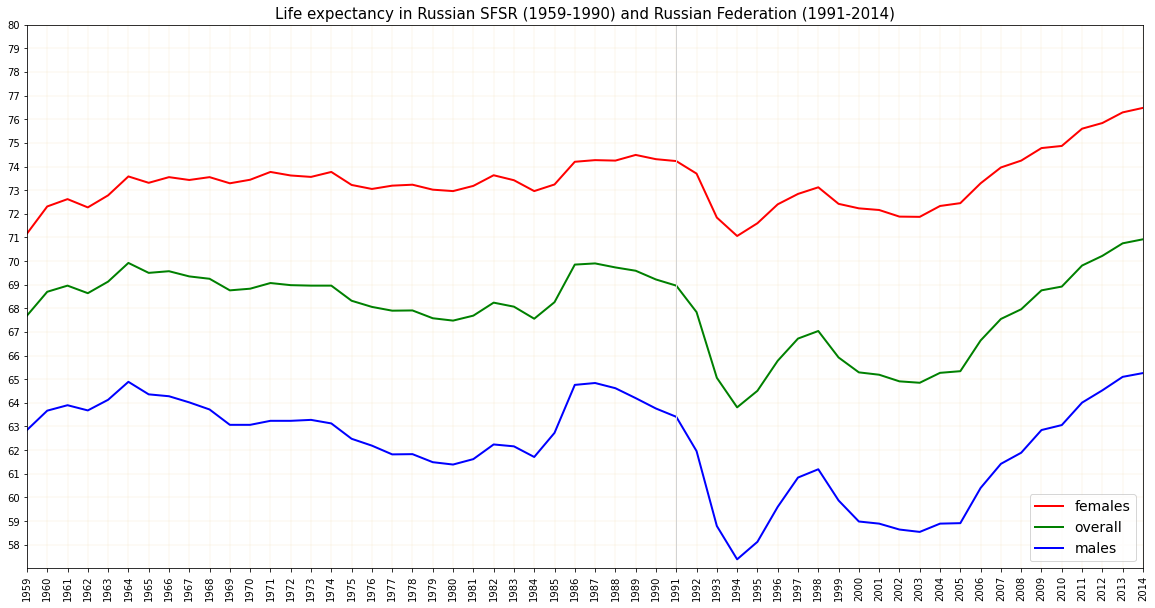

In [10]:
# create chart for life expectancy according to the Human Mortality Database (just for interest)
plt.rcParams['figure.figsize'] = (20, 10)

year_min = df_hmdb.index[0]
year_max = df_hmdb.index[-1]

plt.title('Life expectancy in Russian SFSR (1959-1990) and Russian Federation (1991-2014)', fontsize=15)

plt.plot(df_hmdb.index, df_hmdb['females'], 'r-', linewidth=2, label='females')
plt.plot(df_hmdb.index, df_hmdb['overall'], 'g-', linewidth=2, label='overall')
plt.plot(df_hmdb.index, df_hmdb['males'],   'b-', linewidth=2, label='males')

plt.axvline(x=1991, color='lightgrey', linewidth=1)
# plt.axvline(x=2000, color='lightgrey', linewidth=1)

plt.xlim(year_min, year_max)
plt.grid(color='wheat', linewidth=0.25)

labels_x = range(year_min, year_max+1)
labels_y = range(58, 81)
plt.ylim(57, 80)
plt.xticks(labels_x, rotation='vertical')
plt.yticks(labels_y)
plt.legend(loc='lower right', fontsize=14)
plt.show()

In [11]:
# check difference between data from Rosstat and the Human Mortality Database
pd.concat([df_rosstat.loc[1990:2014, 'females'] - df_hmdb.loc[1990:2014, 'females'],
           df_rosstat.loc[1990:2014, 'overall'] - df_hmdb.loc[1990:2014, 'overall'],
           df_rosstat.loc[1990:2014, 'males']   - df_hmdb.loc[1990:2014, 'males']
           ], axis='columns')

,females,overall,males
1990,-0.01,-0.02,-0.06
1991,-0.03,-0.06,-0.01
1992,0.00,-0.04,-0.06
1993,-0.04,-0.06,0.01
1994,0.04,0.09,0.02
1995,0.00,-0.01,-0.02
1996,0.00,0.02,0.00
1997,-0.04,-0.02,0.06
1998,-0.02,0.06,0.01
1999,-0.02,-0.02,0.03


<br />
<br />
<br />

In [12]:
# concat data from two sources
df = pd.concat([df_hmdb.loc[:1989, :], df_rosstat])
df.loc[1985:1995]

,females,overall,males
1985,73.24,68.26,62.73
1986,74.20,69.85,64.76
1987,74.27,69.90,64.84
1988,74.25,69.73,64.62
1989,74.49,69.59,64.20
1990,74.30,69.20,63.70
1991,74.20,68.90,63.40
1992,73.70,67.80,61.90
1993,71.80,65.00,58.80
1994,71.10,63.90,57.40


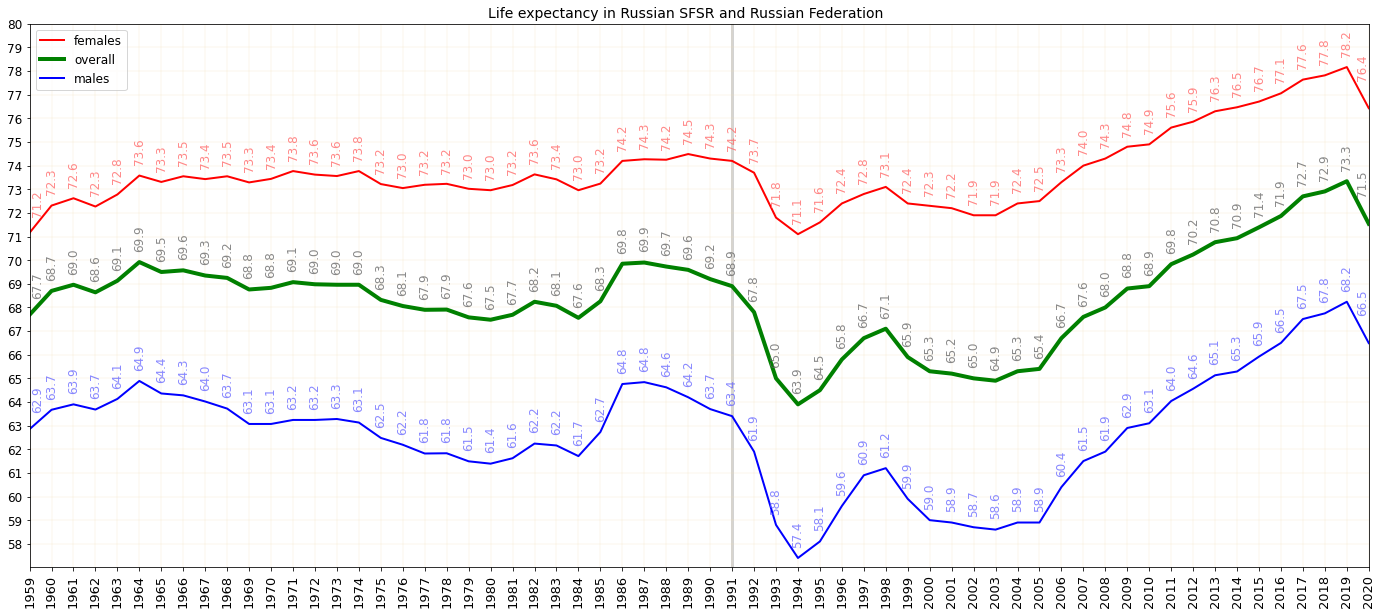

In [13]:
# create chart for joint data
plt.rcParams['figure.figsize'] = (24, 10)

year_min = df.index[0]
year_max = df.index[-1]

plt.title('Life expectancy in Russian SFSR and Russian Federation      ', fontsize=14)

for row_name, color_line, color_text, line_width in zip(['females', 'overall', 'males'],
                                                        ['red', 'green', 'blue'],
                                                        ['#FF6060', '#606060',  '#6060FF'],
                                                        [2, 4, 2]):
    plt.plot(df.index, df[row_name], linestyle='-', color=color_line, linewidth=line_width, label=row_name)
    for x,y in zip(df.index, df[row_name]):
        label = "{:.1f}".format(y)
        plt.annotate(label, # this is the text
                     (x+0.07,y+0.4) if x==year_min else (x,y+0.85) if x==year_max else (x,y+0.15), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='left' if x==year_min else 'right' if x==year_max else 'center', # horizontal alignment can be left, right or center
                     color=color_text,   #'dimgrey',
                     alpha=0.75,
                     rotation=90,
                     fontsize=12)
        
# for l in [1953, 1964, 1982, 1984, 1985, 1991, 2000, 2008, 2012]:
#     plt.axvline(x=l, color='lightgrey', linewidth=1)
        
plt.axvline(x=1991, color='lightgrey', linewidth=3, zorder=0)
# plt.axvline(x=2000, color='lightgrey', linewidth=1)

plt.xlim(year_min, year_max)
plt.grid(color='wheat', linewidth=0.25)

labels_x = range(year_min, year_max+1)
labels_y = range(58, 81)
plt.ylim(57, 80)
plt.xticks(labels_x, fontsize=13, rotation='vertical')
plt.yticks(labels_y, fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

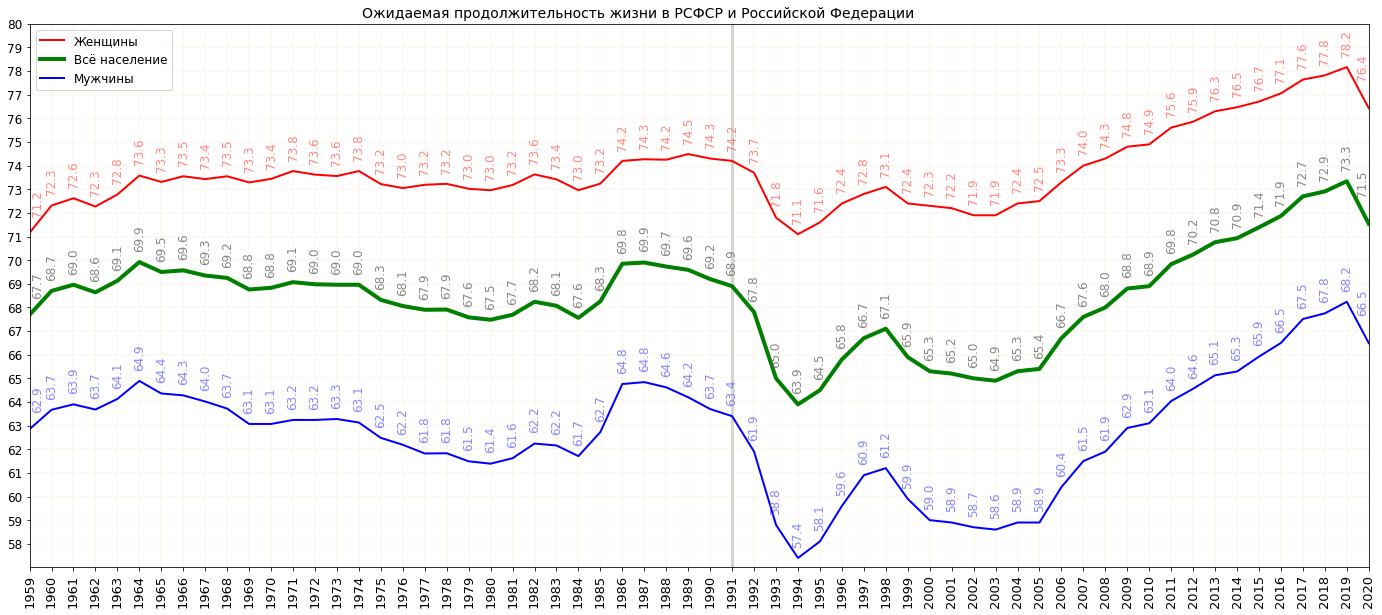

In [14]:
# Russian version of the chart
plt.title('Ожидаемая продолжительность жизни в РСФСР и Российской Федерации                           ', fontsize=14)

for row_name, color_line, color_text, line_width in zip(['females', 'overall', 'males'],
                                                        ['red', 'green', 'blue'],
                                                        ['#FF6060', '#606060',  '#6060FF'],
                                                        [2, 4, 2]):
    plt.plot(df.index, df[row_name], linestyle='-', color=color_line, linewidth=line_width, label=dd_to_rus[row_name])
    for x,y in zip(df.index, df[row_name]):
        label = "{:.1f}".format(y)
        plt.annotate(label, # this is the text
                     (x+0.07,y+0.4) if x==year_min else (x,y+0.85) if x==year_max else (x,y+0.15), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='left' if x==year_min else 'right' if x==year_max else 'center', # horizontal alignment can be left, right or center
                     color=color_text,   #'dimgrey',
                     alpha=0.75,
                     rotation=90,
                     fontsize=12)
        
plt.axvline(x=1991, color='lightgrey', linewidth=3, zorder=0)

plt.xlim(year_min, year_max)
plt.grid(color='wheat', linewidth=0.25)

labels_x = range(year_min, year_max+1)
labels_y = range(58, 81)
plt.ylim(57, 80)
plt.xticks(labels_x, fontsize=13, rotation='vertical')
plt.yticks(labels_y, fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

<br />
<br />

In [15]:
plt.rcParams['figure.figsize'] = (24, 10)

In [16]:
def place_text(plt, x, y, s, fs=16):
    plt.text(x=x-0.3, y=y-0.2, s=s, verticalalignment='top', fontsize=fs, color='dimgray')  # #4B0082   #5F9EA0

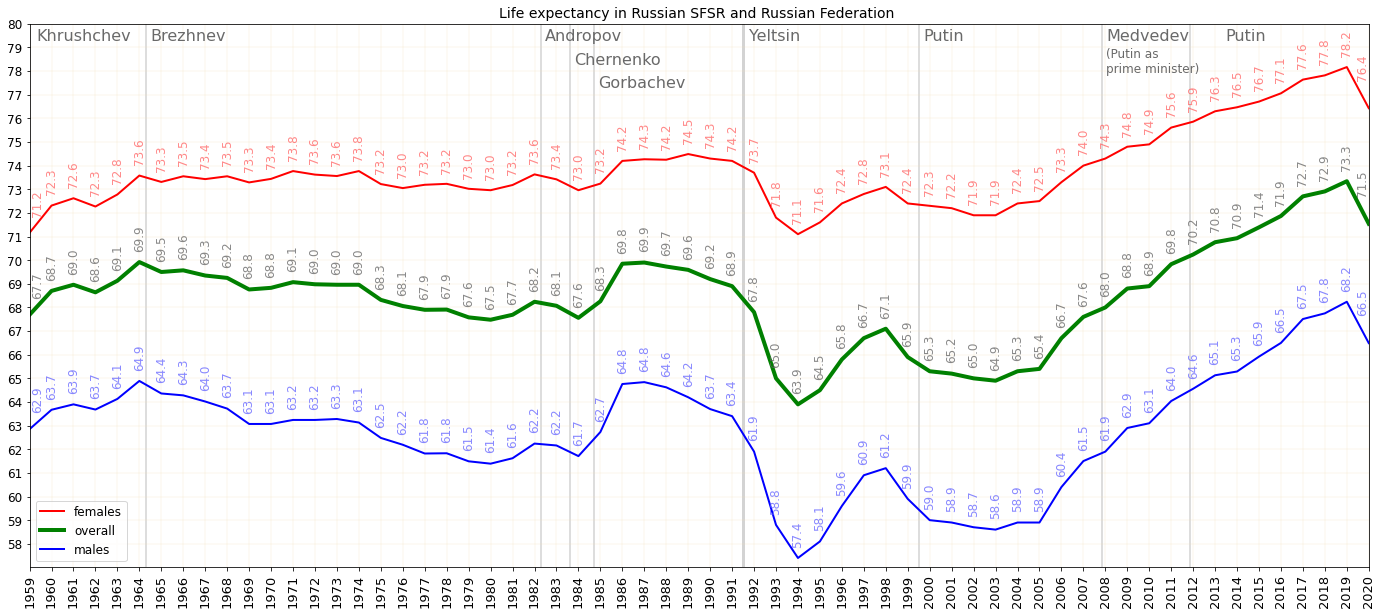

In [17]:
# matching life extension to leaders 
plt.title('Life expectancy in Russian SFSR and Russian Federation ', fontsize=14)

for row_name, color_line, color_text, line_width in zip(['females', 'overall', 'males'],
                                                        ['red', 'green', 'blue'],
                                                        ['#FF6060', '#606060',  '#6060FF'],
                                                        [2, 4, 2]):
    plt.plot(df.index, df[row_name], linestyle='-', color=color_line, linewidth=line_width, label=row_name)
    for x,y in zip(df.index, df[row_name]):
        label = "{:.1f}".format(y)
        plt.annotate(label, # this is the text
                     (x+0.07,y+0.4) if x==year_min else (x,y+0.85) if x==year_max else (x,y+0.15), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='left' if x==year_min else 'right' if x==year_max else 'center', # horizontal alignment can be left, right or center
                     color=color_text,   #'dimgrey',
                     alpha=0.75,
                     rotation=90,
                     fontsize=12)
        
plt.axvline(x=1991.98082-0.5, color='lightgrey', linewidth=3, zorder=0)
for year in [1964.78415, 1982.77808, 1984.11749, 1985.18904, 1991.98082, 2000, 2008.34699, 2012.34699]:
    plt.axvline(x=year-0.5, color='lightgrey', linewidth=1.5, zorder=0)
    
# plt.text( x=1959, y=72.5, s='Хрущёв', fontsize=32, color='grey')

place_text(plt, 1959.6, 80, 'Khrushchev')
place_text(plt, 1964.78415, 80, 'Brezhnev')
place_text(plt, 1982.77808, 80, 'Andropov')
place_text(plt, 1984.11749, 79, 'Chernenko')
place_text(plt, 1985.18904, 78, 'Gorbachev')
place_text(plt, 1991.98082+0.1, 80, 'Yeltsin')
place_text(plt, 2000, 80, 'Putin')
place_text(plt, 2008.34699, 80, 'Medvedev')
place_text(plt, 2008.34699, 79.2, '(Putin as\nprime minister)', fs=12)
place_text(plt, 2013.75, 80, 'Putin')


plt.xlim(year_min, year_max)
plt.grid(color='wheat', linewidth=0.25)

labels_x = range(year_min, year_max+1)
labels_y = range(58, 81)
plt.ylim(57, 80)
plt.xticks(labels_x, fontsize=13, rotation='vertical')
plt.yticks(labels_y, fontsize=12)
plt.legend(loc='lower left', fontsize=12)
plt.show()

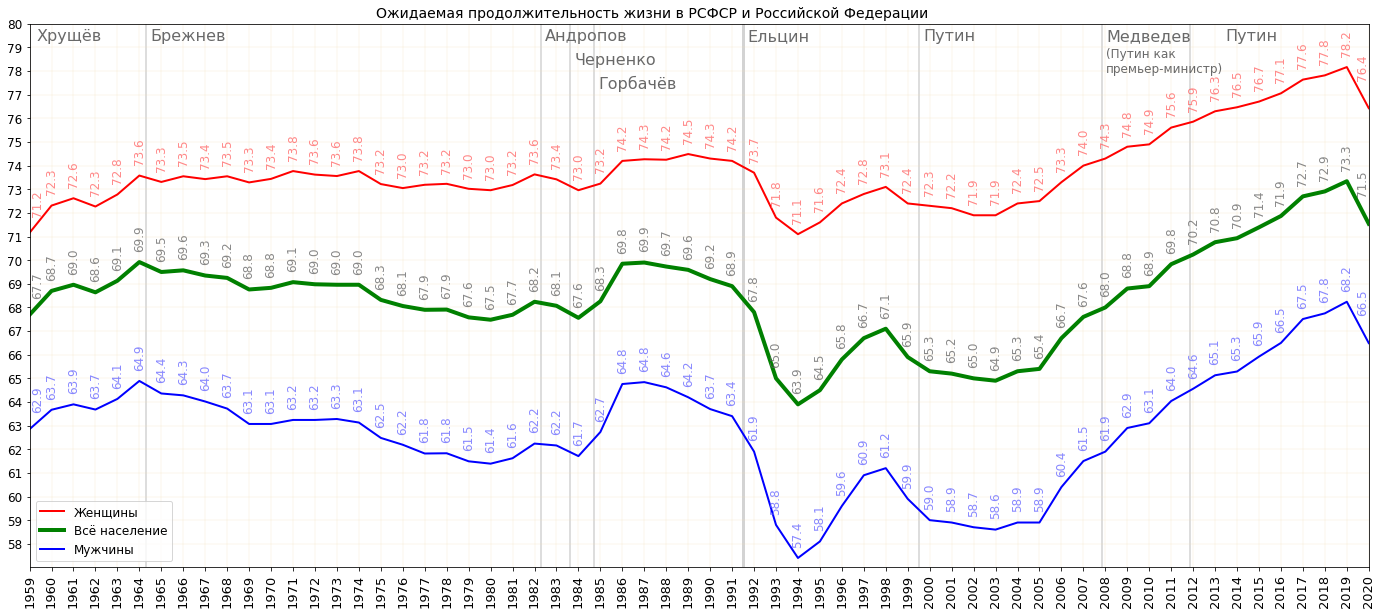

In [18]:
# Russian version of the chart
plt.title('Ожидаемая продолжительность жизни в РСФСР и Российской Федерации                     ', fontsize=14)

for row_name, color_line, color_text, line_width in zip(['females', 'overall', 'males'],
                                                        ['red', 'green', 'blue'],
                                                        ['#FF6060', '#606060',  '#6060FF'],
                                                        [2, 4, 2]):
    plt.plot(df.index, df[row_name], linestyle='-', color=color_line, linewidth=line_width, label=dd_to_rus[row_name])
    for x,y in zip(df.index, df[row_name]):
        label = "{:.1f}".format(y)
        plt.annotate(label, # this is the text
                     (x+0.07,y+0.4) if x==year_min else (x,y+0.85) if x==year_max else (x,y+0.15), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='left' if x==year_min else 'right' if x==year_max else 'center', # horizontal alignment can be left, right or center
                     color=color_text,   #'dimgrey',
                     alpha=0.75,
                     rotation=90,
                     fontsize=12)
        
plt.axvline(x=1991.98082-0.5, color='lightgrey', linewidth=3, zorder=0)
for year in [1964.78415, 1982.77808, 1984.11749, 1985.18904, 1991.98082, 2000, 2008.34699, 2012.34699]:
    plt.axvline(x=year-0.5, color='lightgrey', linewidth=1.5, zorder=0)
    
# plt.text( x=1959, y=72.5, s='Хрущёв', fontsize=32, color='grey')

place_text(plt, 1959.6, 80, 'Хрущёв')
place_text(plt, 1964.78415, 80, 'Брежнев')
place_text(plt, 1982.77808, 80, 'Андропов')
place_text(plt, 1984.11749, 79, 'Черненко')
place_text(plt, 1985.18904, 78, 'Горбачёв')
place_text(plt, 1991.98082, 80, 'Ельцин')
place_text(plt, 2000, 80, 'Путин')
place_text(plt, 2008.34699, 80, 'Медведев')
place_text(plt, 2008.34699, 79.2, '(Путин как\nпремьер-министр)', fs=12)
place_text(plt, 2013.75, 80, 'Путин')


plt.xlim(year_min, year_max)
plt.grid(color='wheat', linewidth=0.25)

labels_x = range(year_min, year_max+1)
labels_y = range(58, 81)
plt.ylim(57, 80)
plt.xticks(labels_x, fontsize=13, rotation='vertical')
plt.yticks(labels_y, fontsize=12)
plt.legend(loc='lower left', fontsize=12)
plt.show()